<a href="https://colab.research.google.com/github/jdragu/K-C-Hackathon-Prediction/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hackathon Finalist Prediction

## Import libraries, load data

In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [6]:
# Mount google colab to my Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
# Load data
df=pd.read_csv('/content/hackathon_ideas.csv')

df

,idea_name,description,general_benefits,region,submitted_estimate,service_line,category,original,actual_benefits_wc,actual_benefits_savings,...,judge_scalability,judge_crowd_validation,judge_weighted_avg,chatgpt_distruption_overview,chatgpt_ease_implementation,chatgpt_scalability,chatgpt_benefits,chatgpt_rationale,finalist,winner
0,Italy Payment Terms Harmonization,"After assessing DSO opportunities, the team id...",USD$4.2M improvement in AR approx. 8 days in D...,EMEA,4200000.0,OTC,AR-Payment Terms,1,3946441.0,224992.0,...,8,10,7,4.0,3.0,3.0,NaN,This idea proposes to simplify payment terms f...,1,0
1,LAO Preliminary PWC Report Driving timely R&am...,Brief Project Description: PWC and CCC reports...,To increase PWC and CCC visibility before mont...,LAO,0.0,GBS OPS,Forecast Improvement,1,0.0,0.0,...,,,,2.0,5.0,4.0,NaN,This idea proposes to provide preliminary PWC ...,0,0
2,LAO Payment Runs Optimization (From 3 to 2),"During 2020 and considering COVID-19 reality, ...","Approx USD$1.5M per month, USD$18M per year\r...",LAO,1500000.0,PTP,AP-Payment Terms,1,47392618.0,1267031.0,...,8,3,7,3.0,4.0,4.0,NaN,This idea proposes to move from 3 to 2 payment...,0,0
3,Global PWC General Ledger Benchmark,"Across KC, PWC estimation is standard in terms...",To carry out a GL benchmark across all PWC com...,Global,5000000.0,GBS OPS,Working Capital,1,0.0,0.0,...,10,10,6,3.0,3.0,4.0,NaN,This idea proposes to carry out a GL benchmark...,1,0
4,CCC Playbook and CCC - Road to 0 Days,"LAO GBS, in partnership with Finance &amp; Sup...",200% target execution by sub-region as of 2020...,LAO,10000000.0,GBS OPS,Working Capital,1,0.0,0.0,...,,,,4.0,4.0,4.0,NaN,This idea proposes to implement initiatives ac...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Monthly payment implementation of the Costa Ri...,"In 2023, the payroll payment for the Costa Ric...",The benefit of extending the payment terms for...,LAO,1000000.0,Treasury,NaN,1,NaN,NaN,...,,,,3.0,4.0,4.0,4.0,"This idea is not entirely new, but it propose...",0,0
316,Interstellar investments,The interest earned on investments in banks in...,we expect to have income of up to $498k,LAO,498000.0,Treasury,NaN,1,NaN,NaN,...,3,3,3,2.0,1.0,4.0,3.0,"This idea is not disruptive, but it has the p...",1,0
317,Papel Zero,The objective of the project is the eliminatio...,Positive impact on the environment through fib...,LAO,12000.0,PTP,NaN,1,NaN,NaN,...,NaN,NaN,NaN,4.0,3.0,3.0,4.0,This idea is disruptive as it aims to elimina...,0,0
318,Sputnik,The implementation of a Ticketing system in Po...,Improvement in the resolution of incidents tha...,LAO,NaN,Pricing,NaN,1,NaN,NaN,...,NaN,NaN,NaN,4.0,3.0,4.0,3.0,The idea proposes a comprehensive solution to...,0,0


## Preprocess data

### Check for missing values

In [13]:
df.isna().sum()

,0
idea_name,1
description,3
general_benefits,4
region,36
submitted_estimate,45
service_line,1
category,81
original,0
actual_benefits_wc,80
actual_benefits_savings,86


In [14]:
df

,idea_name,description,general_benefits,region,submitted_estimate,service_line,category,original,actual_benefits_wc,actual_benefits_savings,...,judge_scalability,judge_crowd_validation,judge_weighted_avg,chatgpt_distruption_overview,chatgpt_ease_implementation,chatgpt_scalability,chatgpt_benefits,chatgpt_rationale,finalist,winner
0,Italy Payment Terms Harmonization,"After assessing DSO opportunities, the team id...",USD$4.2M improvement in AR approx. 8 days in D...,EMEA,4200000.0,OTC,AR-Payment Terms,1,3946441.0,224992.0,...,8,10,7,4.0,3.0,3.0,NaN,This idea proposes to simplify payment terms f...,1,0
1,LAO Preliminary PWC Report Driving timely R&am...,Brief Project Description: PWC and CCC reports...,To increase PWC and CCC visibility before mont...,LAO,0.0,GBS OPS,Forecast Improvement,1,0.0,0.0,...,,,,2.0,5.0,4.0,NaN,This idea proposes to provide preliminary PWC ...,0,0
2,LAO Payment Runs Optimization (From 3 to 2),"During 2020 and considering COVID-19 reality, ...","Approx USD$1.5M per month, USD$18M per year\r...",LAO,1500000.0,PTP,AP-Payment Terms,1,47392618.0,1267031.0,...,8,3,7,3.0,4.0,4.0,NaN,This idea proposes to move from 3 to 2 payment...,0,0
3,Global PWC General Ledger Benchmark,"Across KC, PWC estimation is standard in terms...",To carry out a GL benchmark across all PWC com...,Global,5000000.0,GBS OPS,Working Capital,1,0.0,0.0,...,10,10,6,3.0,3.0,4.0,NaN,This idea proposes to carry out a GL benchmark...,1,0
4,CCC Playbook and CCC - Road to 0 Days,"LAO GBS, in partnership with Finance &amp; Sup...",200% target execution by sub-region as of 2020...,LAO,10000000.0,GBS OPS,Working Capital,1,0.0,0.0,...,,,,4.0,4.0,4.0,NaN,This idea proposes to implement initiatives ac...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Monthly payment implementation of the Costa Ri...,"In 2023, the payroll payment for the Costa Ric...",The benefit of extending the payment terms for...,LAO,1000000.0,Treasury,NaN,1,NaN,NaN,...,,,,3.0,4.0,4.0,4.0,"This idea is not entirely new, but it propose...",0,0
316,Interstellar investments,The interest earned on investments in banks in...,we expect to have income of up to $498k,LAO,498000.0,Treasury,NaN,1,NaN,NaN,...,3,3,3,2.0,1.0,4.0,3.0,"This idea is not disruptive, but it has the p...",1,0
317,Papel Zero,The objective of the project is the eliminatio...,Positive impact on the environment through fib...,LAO,12000.0,PTP,NaN,1,NaN,NaN,...,NaN,NaN,NaN,4.0,3.0,3.0,4.0,This idea is disruptive as it aims to elimina...,0,0
318,Sputnik,The implementation of a Ticketing system in Po...,Improvement in the resolution of incidents tha...,LAO,NaN,Pricing,NaN,1,NaN,NaN,...,NaN,NaN,NaN,4.0,3.0,4.0,3.0,The idea proposes a comprehensive solution to...,0,0


In [15]:
df.replace('', np.nan, inplace=True)

### Vectorize descriptive variables

In [16]:
# Fill missing values
df['description'].fillna('Missing', inplace=True)
df['general_benefits'].fillna('Missing', inplace=True)
df['chatgpt_rationale'].fillna('Missing', inplace=True)

<ipython-input-16-fc617c937813>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('Missing', inplace=True)
<ipython-input-16-fc617c937813>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [17]:
# Ensure all relevant columns are of string type
df['description'] = df['description'].astype(str)
df['general_benefits'] = df['general_benefits'].astype(str)
df['chatgpt_rationale'] = df['chatgpt_rationale'].astype(str)

In [18]:
# Vectorize the 'description' column
tfidf_description = TfidfVectorizer(max_features=100)
description_tfidf = tfidf_description.fit_transform(df['description']).toarray()
description_df = pd.DataFrame(description_tfidf, columns=tfidf_description.get_feature_names_out())
df = pd.concat([df, description_df], axis=1).drop(columns=['description'])

In [19]:
# Vectorize the 'general_benefits' column
tfidf_general_benefits = TfidfVectorizer(max_features=100)
general_benefits_tfidf = tfidf_general_benefits.fit_transform(df['general_benefits']).toarray()
general_benefits_df = pd.DataFrame(general_benefits_tfidf, columns=tfidf_general_benefits.get_feature_names_out())
df = pd.concat([df, general_benefits_df], axis=1).drop(columns=['general_benefits'])

In [20]:
# Vectorize the 'chatgpt_rationale' column
tfidf_chatgpt_rationale = TfidfVectorizer(max_features=100)
chatgpt_rationale_tfidf = tfidf_chatgpt_rationale.fit_transform(df['chatgpt_rationale']).toarray()
chatgpt_rationale_df = pd.DataFrame(chatgpt_rationale_tfidf, columns=tfidf_chatgpt_rationale.get_feature_names_out())
df = pd.concat([df, chatgpt_rationale_df], axis=1).drop(columns=['chatgpt_rationale'])

### Encode categorical variables

In [21]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['idea_name', 'region', 'service_line', 'category']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

### Normalize numerical variables

In [22]:
# Convert 'Missing' strings to NaNs in numerical columns
numerical_columns = ['actual_benefits_wc', 'actual_benefits_savings',
                     'expert_overview', 'expert_ease_implementation', 'expert_scalability',
                     'expert_crowd_validation', 'expert_weighted_avg',
                     'judge_overview', 'judge_ease_implementation', 'judge_scalability',
                     'judge_crowd_validation', 'judge_weighted_avg',
                     'chatgpt_distruption_overview', 'chatgpt_ease_implementation',
                     'chatgpt_scalability', 'chatgpt_benefits']

df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

In [23]:
# Coerce non-numeric values to numeric and fill remaining NaNs with 0
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

In [24]:
# Normalize numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### Fill in "original" NaN with an assumed 1 for originality

In [25]:
# Fill NaN values in the 'original' column with 1s
df['original'] = df['original'].fillna(1)

# Check to ensure the filling is done
print(df['original'].isnull().sum())

0


### Drop irrelevant columns

In [26]:
# Let's drop submitted_estimate, since there are too many blank instances
df.drop(['submitted_estimate'],axis=1, inplace=True)

In [27]:
# Now let's list out all the columns
## There are lots of new ones we got after undergoing vectorization of description columns and encoding categorical variables
### Many may not be useful
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [28]:
df

,idea_name,region,service_line,category,original,actual_benefits_wc,actual_benefits_savings,expert_overview,expert_ease_implementation,expert_scalability,expert_crowd_validation,expert_weighted_avg,judge_overview,judge_ease_implementation,judge_scalability,judge_crowd_validation,judge_weighted_avg,chatgpt_distruption_overview,chatgpt_ease_implementation,chatgpt_scalability,chatgpt_benefits,finalist,winner,accounts,across,all,also,an,and,are,as,at,bank,based,be,business,but,by,can,cash,celonis,cost,could,credit,currently,customer,customers,data,date,days,de,due,each,end,for,from,gbs,has,have,hours,identify,if,in,information,into,invoice,invoices,is,it,kc,lao,manual,month,more,not,of,on,one,only,or,order,other,our,paid,pay,payment,payments,payroll,per,process,project,report,sales,sap,so,system,team,term,terms,that,the,their,there,these,this,through,time,to,up,us,value,vendor,vendors,via,was,we,were,which,will,with,working,would,year,accuracy,across,all,also,amount,an,and,are,as,at,bank,be,benefit,benefits,better,between,business,by,can,capital,cash,control,controls,cost,could,credit,customer,customers,data,days,de,discount,due,each,end,financial,flow,for,from,has,have,hours,if,impact,improve,improved,improvement,in,increase,invoices,is,it,kc,making,management,manual,month,more,oacute,of,on,or,other,our,pay,payment,payments,payroll,per,potential,process,processing,project,reduce,reducing,reduction,sales,saving,savings,system,team,terms,that,the,their,this,time,to,tool,up,usd,vendors,we,which,will,with,work,working,would,year,aims,an,and,applicable,applied,are,as,be,benefits,better,both,but,by,can,capital,cash,changes,complex,cost,current,customer,customers,data,different,disruption,disruptive,due,ease,easy,efficiency,effort,entirely,feasible,for,from,geographical,geographies,globally,has,high,highly,idea,implement,implementation,improve,in,include,including,innovative,is,it,level,mainly,manual,may,mid,moderate,more,need,new,not,of,on,other,overview,payment,potential,process,proposes,qualitative,quantitative,reduce,reducing,replicable,replicated,require,requires,savings,scalable,scalation,scaled,significant,some,specific,state,term,terms,that,the,this,time,to,too,upgraded,very,way,which,while,with,working
0,159,1,27,11,1,1.110846,0.150542,2.127251,-1.023216,0.654475,1.798103,1.154930,5.404507,0.873787,3.430706,6.829912,3.888816,1.119191,-0.074563,-0.938771,-1.795978,1,0,0.0,0.199525,0.000000,0.0,0.0,0.224050,0.266043,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.125785,0.000000,0.521130,0.000000,0.199525,0.0,0.0,0.185992,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.086009,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.116499,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.292120,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.157092,0.0,0.356685,0.129579,0.295919,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.210466,0.000000,0.000000,0.223686,0.000000,0.143230,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.179673,0.169054,0.0,0.0,0.0,0.162636,0.0,0.149129,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.129835,0.0,0.000000,0.133297,0.0,0.0,0.000000,0.0,0.0,0.0,0.320757,0.0,0.196646,0.0,0.0,0.0,0.000000,0.193363,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.187407,0.201527,0.000000,0.0,0.135128,0.0,0.000000,0.0,0.0,0.000000,0.187407,0.0,0.0,0.258195,0.114303,0.0,0.0,0.000000,0.0,0.140038,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.184687,0.0,0.0,0.0,0.0,0.0,0.334376,0.000000,0.417372,0.0,0.000000,0.133297,0.158510,0.0,0.000000,0.190292,0.000000,0.000000,0.184687,0.000000,0.122858,0.0,0.000000,0.000000,0.000000,0.000000,0.120238,0.192947,0.000000,0.0,0.066262,0.077887,0.000000,0.052492,0.0,0.100495,0.071706,0.128145,0.000000,0.0,0.384436,0.14982,0.0,0.0,0.000000,0.0,0.144586,0.0,0.000000,0.0,0.000000

In [29]:
# Let's drop the filler words, like 'an', 'and', etc
df.drop(['an','and','are','as','at','be','but','by','can','could','de','each','from','has',
        'have','if','in','into','is','it','not','of','on','one','only','or','other','our',
        'per','so','that','the','their','there','these','this','through','to','us','via','we',
        'was','were','which','will','with','would','also'],axis=1, inplace=True)

In [30]:
# Round 2 of dropping irrelevant words
df.drop(['for','very'],axis=1, inplace=True)

## Train the data

### Split into train and test

In [31]:
# Define features and target
X = df.drop(['finalist', 'winner'], axis=1)
y = df['finalist']

In [32]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

### Train the model

In [34]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

## Evaluate the model

In [35]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.96875
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.67      0.80         6

    accuracy                           0.97        64
   macro avg       0.98      0.83      0.89        64
weighted avg       0.97      0.97      0.97        64

Confusion Matrix:
 [[58  0]
 [ 2  4]]


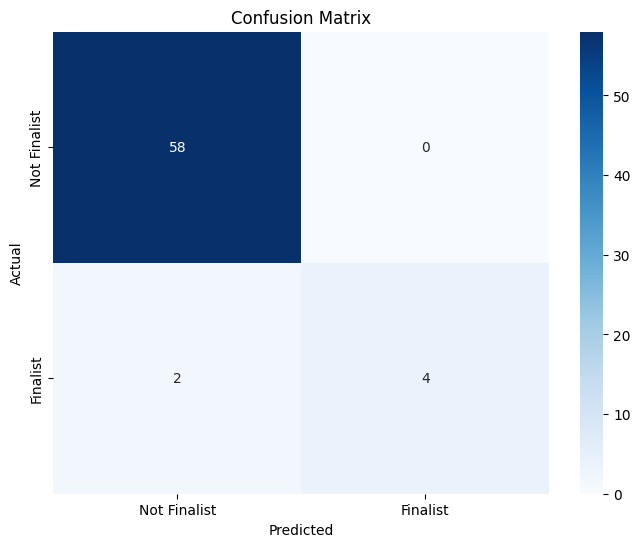

In [36]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Finalist', 'Finalist'], yticklabels=['Not Finalist', 'Finalist'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Feature importance

In [37]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df.head(10))

                       Feature  Importance
16          judge_weighted_avg    0.102779
14           judge_scalability    0.098255
13   judge_ease_implementation    0.090698
12              judge_overview    0.078708
15      judge_crowd_validation    0.070663
11         expert_weighted_avg    0.029497
7              expert_overview    0.027459
149                  customers    0.020723
64                       terms    0.020142
128                       time    0.018211


In [38]:
# Create an interactive bar plot
fig = px.bar(feature_importance_df, x='Importance', y='Feature', title='Feature Importances', orientation='h')

# Update layout for scrollability
fig.update_layout(
    height=800,  # Adjust height as needed
    yaxis={'categoryorder':'total ascending'},
    yaxis_tickfont_size=10
)

fig.show()